Task: Take video images, detect positions of balls, use to motion track a 
hanging pilot's harness from above on a RaspberryPi
    
First attempt to do this using PC webcam and OpenCV

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline`


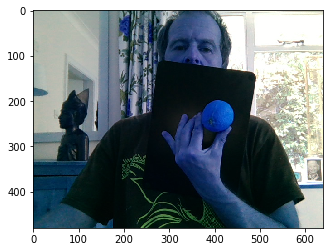

In [22]:
ret, frame = cap.read()
plt.imshow(frame)

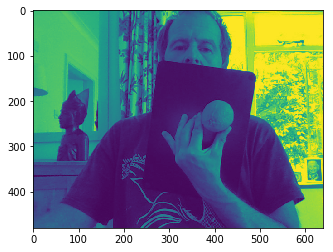

In [26]:
g1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#g1 = frame[:,:,2]/2 + frame[:,:,1]/2
plt.imshow(g1)

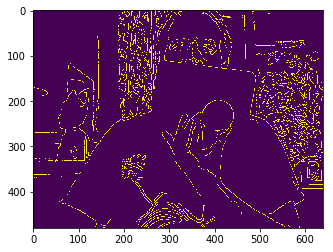

In [94]:
#g2 = cv2.GaussianBlur(g1, (9,9), 8, 8)
#g2 = g1
g2 = cv2.bilateralFilter(g1, 8, 100, 100)
ck = 50
g3 = cv2.Canny(g2, ck/2, ck)
plt.imshow(g3)
#plt.imshow(g2)


In [96]:
# param1 goes into the Canny edge detector, which itself works on a blurred image
circles = cv2.HoughCircles(g2, cv2.HOUGH_GRADIENT, dp=2, minDist=10, param1=50, param2=90, minRadius=10, maxRadius=50)
print(circles is not None and len(circles[0]))
print(circles)


4
[[[ 411.          231.           31.7804966 ]
  [ 229.          167.           32.01562119]
  [ 577.          199.           33.60059357]
  [ 287.          449.           25.49509811]]]


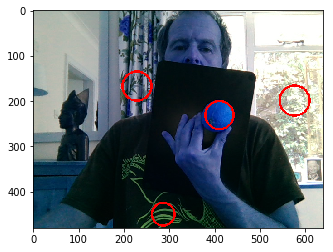

In [97]:
output = frame.copy()
for (x, y, r) in circles[0]:
    x, y = int(x), int(y)
    cv2.circle(output, (x, y), r, (255, 0, 0), 4)
    #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
plt.imshow(output)


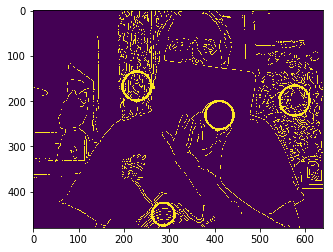

In [93]:
output = g3.copy()
for (x, y, r) in circles[0]:
    x, y = int(x), int(y)
    cv2.circle(output, (x, y), r, (255, 0, 0), 4)
    #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
plt.imshow(output)
